In [6]:
#결측값 없음
# 매출, 순매출, 평균소비자가 모두 수치형으로(thousands = ',' 으로 해결)
# 날짜형으로 변경안해도됨.

In [111]:
raw_df=pd.read_csv("./Raw.csv",thousands = ',')
raw_df=raw_df.rename(columns={' 매출':'매출',' 순매출':'순매출',
                                ' 수량':'수량', ' 평균소비자가':'평균소비자가',
                                ' Stores':'Stores', ' SKU':'SKU'})
raw_df.head()

,판매일자,매출,순매출,수량,평균소비자가,할인율,Stores,SKU
0,6/1/2017,2502000,2383400,18,139000,0.05,48,4
1,6/2/2017,6086000,5984800,45,135244,0.02,48,8
2,6/3/2017,12778000,12510600,92,138891,0.02,48,8
3,6/4/2017,10842000,10631400,78,139000,0.02,48,7
4,6/5/2017,5560000,5522100,41,135610,0.01,48,7


## 1. 수량 예측

[[0.28730018801244983, 0.18656716410948984, 0.3067440633242145, 0.06153845207100738, 0.7499999973214285, 0.4999999982142857, 0.0, 0.0], [0.5090144558950855, 0.33955223867927153, 0.32086543535586187, 0.10769229112426291, 0.7499999973214285, 0.6428571405612244, 0.9999999000000099, 0.0], [0.5960501782607655, 0.3880597013477389, 0.29236939313953314, 0.046153839053255534, 0.7499999973214285, 0.7857142829081633, 0.9999999000000099, 0.9999999000000099], [0.21815685387297762, 0.14925373128759187, 0.253488126648809, 0.07692306508875922, 0.7499999973214285, 0.6071428549744898, 0.0, 0.0], [0.2551586403813288, 0.16044776113416126, 0.36195250659592404, 0.06153845207100738, 0.7499999973214285, 0.5357142838010204, 0.0, 0.0], [0.2862977149856054, 0.20522388052043883, 0.27251715039549074, 0.1692307431952703, 0.7499999973214285, 0.46428571262755103, 0.0, 0.0], [0.17004204925770122, 0.1194029850300735, 0.2327493403691475, 0.09230767810651107, 0.7499999973214285, 0.46428571262755103, 0.0, 0.0], [0.2387836

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            11800     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 120)              

21/21 [==============================] - 2s 92ms/step - loss: 0.0102 - accuracy: 0.0000e+00
Epoch 64/200
21/21 [==============================] - 2s 92ms/step - loss: 0.0110 - accuracy: 0.0000e+00 1s - loss:
Epoch 65/200
21/21 [==============================] - 2s 94ms/step - loss: 0.0109 - accuracy: 0.0000e+00
Epoch 66/200
21/21 [==============================] - 2s 92ms/step - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 67/200
21/21 [==============================] - 2s 92ms/step - loss: 0.0116 - accuracy: 0.0000e+00
Epoch 68/200
21/21 [==============================] - 2s 92ms/step - loss: 0.0102 - accuracy: 0.0000e+00
Epoch 69/200
21/21 [==============================] - 2s 93ms/step - loss: 0.0097 - accuracy: 0.0000e+00
Epoch 70/200
21/21 [==============================] - 2s 92ms/step - loss: 0.0095 - accuracy: 0.0000e+00
Epoch 71/200
21/21 [==============================] - 2s 92ms/step - loss: 0.0096 - accuracy: 0.0000e+00 0s - loss: 0.0096 - accuracy: 0.0000e+
Epoch 72/200
21/21

21/21 [==============================] - 2s 95ms/step - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 140/200
21/21 [==============================] - 2s 93ms/step - loss: 0.0067 - accuracy: 0.0000e+00
Epoch 141/200
21/21 [==============================] - 2s 93ms/step - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 142/200
21/21 [==============================] - 2s 92ms/step - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 143/200
21/21 [==============================] - 2s 93ms/step - loss: 0.0061 - accuracy: 0.0000e+00
Epoch 144/200
21/21 [==============================] - 2s 93ms/step - loss: 0.0064 - accuracy: 0.0000e+00 0s - loss: 0.0065 - accuracy: 0.00
Epoch 145/200
21/21 [==============================] - 2s 93ms/step - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 146/200
21/21 [==============================] - 2s 93ms/step - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 147/200
21/21 [==============================] - 2s 92ms/step - loss: 0.0063 - accuracy: 0.0000e+00 0s - loss: 0.0047 - accur

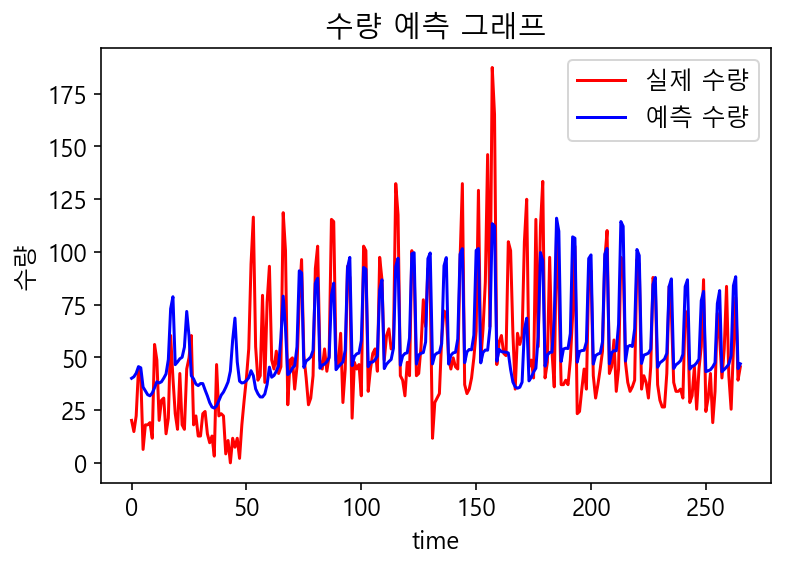

31

In [58]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pllt

raw_df=pd.read_csv("./Raw.csv",thousands = ',')
raw_df=raw_df.rename(columns={' 매출':'매출',' 순매출':'순매출',
                                ' 수량':'수량', ' 평균소비자가':'평균소비자가',
                                ' Stores':'Stores', ' SKU':'SKU'})


##### 새로운 변수 추가######

def weekday2(data):
    list=[]
    for i in data:
        # weekday()는 해당 날짜의 요일을 출력. 5는 토,6은 일요일
        if datetime.strptime(f"{i}", "%m/%d/%Y").weekday()>=5:
            list.append(1)
        else:
            list.append(0)
    return list

raw_df['week']=weekday2(raw_df['판매일자'])
# 주말 변수 : 주말 수량, 매출이 평일보다 많음.

# 높은 SKU 변수 : 24이상
highsku=(raw_df['SKU']>=24)
raw_df['highsku']=highsku.astype(int)


def MinMaxScaler1(data):
    # 정규화 코드
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

dfx = raw_df[['순매출','수량', '평균소비자가',
              '할인율', 'Stores', 'SKU',
              'week','highsku']] # 이거 갯수=data_size 수

dfx = MinMaxScaler1(dfx)
dfy = dfx[['수량']]      

x = dfx.values.tolist()
y = dfy.values.tolist()




window_size = 60 # 학습할 시계열 데이터수(60=60일)

# 데이터셋 준비하기
data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] 
    _y = y[i + window_size]     
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)



# 훈련용데이터셋
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])



#테스트용 데이터셋
test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])


data_size = len(dfx.columns) # 학습에 사용할 변수 갯수


# 모델 생성
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(window_size, data_size)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation="relu",return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
model.fit(train_x, train_y, epochs=200, batch_size=30)
pred_y = model.predict(test_x)


# print('##### Test Result #####')
# print('loss : ',str(loss_and_metrics[0]))
# print('Accuracy : ',str(loss_and_metrics[1]))

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print(f"RMSE 값 : {rmse}")
# sklearn은 mse만 지원하기 때문에 rmse와 rmsle는 직접 만들어야 합니다.
# y_preds는 예측값들이 담긴 데이터, y_test는 실제값 데이터들입니다.


# 역정규화 필요
scale=1/(dfx['수량']/raw_df['수량'])


#print(scale)
#%% 역정규화시켜야함.즉, 원래의 데이터로 만들어야해서
pred_y=pred_y*scale[0]
test_y=test_y*scale[0]
#print(pred_y)
#print(test_y)



# Visualising the results
%matplotlib inline

plt.figure()
pllt.rcParams["font.family"]="Malgun Gothic"
pllt.rcParams["font.size"]=12
pllt.rcParams["figure.figsize"]=(14,4)
mpl.rcParams['axes.unicode_minus']=False

plt.plot(test_y, color='red', label='실제 수량')
plt.plot(pred_y, color='blue', label='예측 수량')
plt.title('수량 예측 그래프')
plt.xlabel('time')
plt.ylabel('수량')
plt.legend()
plt.show()
%config InlineBackend.figure_format = 'retina'


result1= pred_y[:31]
len(result1)

## 2. 순매출 예측

[[0.28730018801244983, 0.18656716410948984, 0.3067440633242145, 0.06153845207100738, 0.7499999973214285, 0.4999999982142857, 0.0, 0.0], [0.5090144558950855, 0.33955223867927153, 0.32086543535586187, 0.10769229112426291, 0.7499999973214285, 0.6428571405612244, 0.9999999000000099, 0.0], [0.5960501782607655, 0.3880597013477389, 0.29236939313953314, 0.046153839053255534, 0.7499999973214285, 0.7857142829081633, 0.9999999000000099, 0.9999999000000099], [0.21815685387297762, 0.14925373128759187, 0.253488126648809, 0.07692306508875922, 0.7499999973214285, 0.6071428549744898, 0.0, 0.0], [0.2551586403813288, 0.16044776113416126, 0.36195250659592404, 0.06153845207100738, 0.7499999973214285, 0.5357142838010204, 0.0, 0.0], [0.2862977149856054, 0.20522388052043883, 0.27251715039549074, 0.1692307431952703, 0.7499999973214285, 0.46428571262755103, 0.0, 0.0], [0.17004204925770122, 0.1194029850300735, 0.2327493403691475, 0.09230767810651107, 0.7499999973214285, 0.46428571262755103, 0.0, 0.0], [0.2387836

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 60, 50)            11800     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 60, 60)            26640     
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_14 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 120)              

21/21 [==============================] - 2s 94ms/step - loss: 0.0241 - accuracy: 0.0000e+00
Epoch 63/200
21/21 [==============================] - 2s 95ms/step - loss: 0.0240 - accuracy: 0.0000e+00
Epoch 64/200
21/21 [==============================] - 2s 95ms/step - loss: 0.0238 - accuracy: 0.0000e+00
Epoch 65/200
21/21 [==============================] - 2s 94ms/step - loss: 0.0247 - accuracy: 0.0000e+00
Epoch 66/200
21/21 [==============================] - 2s 95ms/step - loss: 0.0233 - accuracy: 0.0000e+00
Epoch 67/200
21/21 [==============================] - 2s 93ms/step - loss: 0.0239 - accuracy: 0.0000e+00
Epoch 68/200
21/21 [==============================] - 2s 93ms/step - loss: 0.0244 - accuracy: 0.0000e+00
Epoch 69/200
21/21 [==============================] - 2s 94ms/step - loss: 0.0235 - accuracy: 0.0000e+00
Epoch 70/200
21/21 [==============================] - 2s 93ms/step - loss: 0.0245 - accuracy: 0.0000e+00
Epoch 71/200
21/21 [==============================] - 2s 94ms/step -

21/21 [==============================] - 2s 94ms/step - loss: 0.0101 - accuracy: 0.0000e+00
Epoch 139/200
21/21 [==============================] - 2s 97ms/step - loss: 0.0104 - accuracy: 0.0000e+00
Epoch 140/200
21/21 [==============================] - 2s 95ms/step - loss: 0.0098 - accuracy: 0.0000e+00 0s - loss: 0.0121 
Epoch 141/200
21/21 [==============================] - 2s 94ms/step - loss: 0.0103 - accuracy: 0.0000e+00
Epoch 142/200
21/21 [==============================] - 2s 95ms/step - loss: 0.0104 - accuracy: 0.0000e+00 1s - loss: 0.0
Epoch 143/200
21/21 [==============================] - 2s 94ms/step - loss: 0.0094 - accuracy: 0.0000e+00
Epoch 144/200
21/21 [==============================] - 2s 94ms/step - loss: 0.0106 - accuracy: 0.0000e+00 1s - loss:
Epoch 145/200
21/21 [==============================] - 2s 94ms/step - loss: 0.0101 - accuracy: 0.0000e+00
Epoch 146/200
21/21 [==============================] - 2s 93ms/step - loss: 0.0101 - accuracy: 0.0000e+00
Epoch 147/200
2

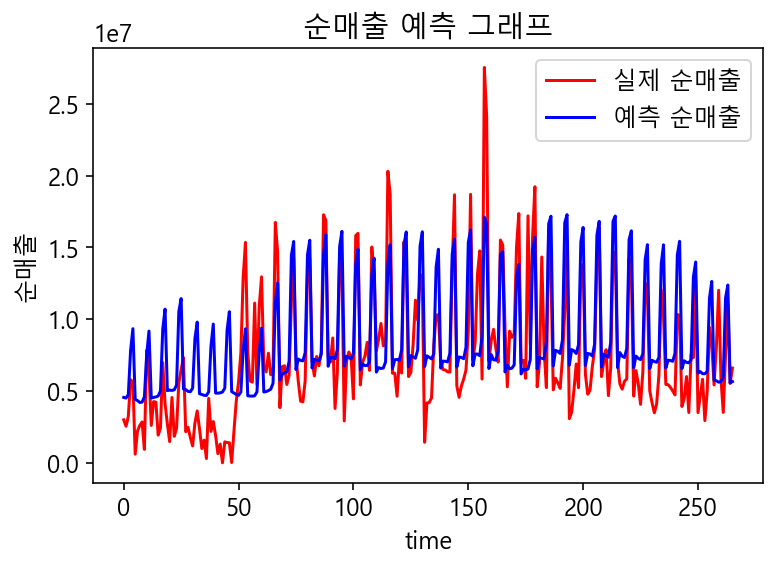

31

In [59]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pllt

raw_df=pd.read_csv("./Raw.csv",thousands = ',')
raw_df=raw_df.rename(columns={' 매출':'매출',' 순매출':'순매출',
                                ' 수량':'수량', ' 평균소비자가':'평균소비자가',
                                ' Stores':'Stores', ' SKU':'SKU'})

##### 새로운 변수 추가######

def weekday2(data):
    list=[]
    for i in data:
        # weekday()는 해당 날짜의 요일을 출력. 5는 토,6은 일요일
        if datetime.strptime(f"{i}", "%m/%d/%Y").weekday()>=5:
            list.append(1)
        else:
            list.append(0)
    return list

raw_df['week']=weekday2(raw_df['판매일자'])
# 주말 변수 : 주말 수량, 매출이 평일보다 많음.

# 높은 SKU 변수 : 24이상
highsku=(raw_df['SKU']>=24)
raw_df['highsku']=highsku.astype(int)


def MinMaxScaler1(data):
    # 정규화 코드
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

dfx = raw_df[['순매출','수량', '평균소비자가',
              '할인율', 'Stores', 'SKU',
              'week','highsku']] # 이거 갯수=data_size 수

dfx = MinMaxScaler1(dfx)
dfy = dfx[['순매출']]      

x = dfx.values.tolist()
y = dfy.values.tolist()



# 데이터셋 준비하기
data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] 
    _y = y[i + window_size]     
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)



# 훈련용데이터셋
train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])



#테스트용 데이터셋
test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])


window_size = 60 # 학습할 시계열 데이터수(60=60일)
data_size = len(dfx.columns) # 학습에 사용할 변수 갯수


# 모델 생성
model=Sequential()
model.add(LSTM(units=50,activation="relu",return_sequences=True,input_shape=(window_size, data_size)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation="relu",return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation="relu",return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
model.fit(train_x, train_y, epochs=200, batch_size=30)
pred_y = model.predict(test_x)


# print('##### Test Result #####')
# print('loss : ',str(loss_and_metrics[0]))
# print('Accuracy : ',str(loss_and_metrics[1]))

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test_y, pred_y))
print(f"RMSE 값 : {rmse}")
# sklearn은 mse만 지원하기 때문에 rmse와 rmsle는 직접 만들어야 합니다.
# y_preds는 예측값들이 담긴 데이터, y_test는 실제값 데이터들입니다.


# 역정규화 필요
scale=1/(dfx['순매출']/raw_df['순매출'])


#print(scale)
#%% 역정규화시켜야함.즉, 원래의 데이터로 만들어야해서
pred_y=pred_y*scale[0]
test_y=test_y*scale[0]
#print(pred_y)
#print(test_y)


# Visualising the results
%matplotlib inline

plt.figure()
pllt.rcParams["font.family"]="Malgun Gothic"
pllt.rcParams["font.size"]=12
pllt.rcParams["figure.figsize"]=(14,4)
mpl.rcParams['axes.unicode_minus']=False

plt.plot(test_y, color='red', label='실제 순매출')
plt.plot(pred_y, color='blue', label='예측 순매출')
plt.title('순매출 예측 그래프')
plt.xlabel('time')
plt.ylabel('순매출')
plt.legend()
plt.show()
%config InlineBackend.figure_format = 'retina'


result2= pred_y[:31]
len(result2)

## 3. 예측 데이터셋 구성

In [112]:
import numpy as np
import itertools

dates = pd.date_range('20200101',periods=31)

result1= list(itertools.chain(result1))
result2= list(itertools.chain(result2))

result3=pd.DataFrame(index=dates,columns=['수량','순매출'])
result3['수량']=result1
result3['순매출']=result2
result3

,수량,순매출
2020-01-01,40.082794,4555324.5
2020-01-02,40.801613,4508857.5
2020-01-03,42.488159,4746919.0
2020-01-04,45.601891,7836364.0
2020-01-05,45.045719,9339931.0
2020-01-06,35.926964,4414038.5
2020-01-07,34.160328,4335392.0
2020-01-08,32.302536,4202491.5
2020-01-09,31.771103,4226963.0
2020-01-10,33.101929,4596915.0


In [119]:
import openpyxl
result3.to_excel(".\predict0125.xlsx")

## 4. 탐험적 데이터분석

<AxesSubplot:>

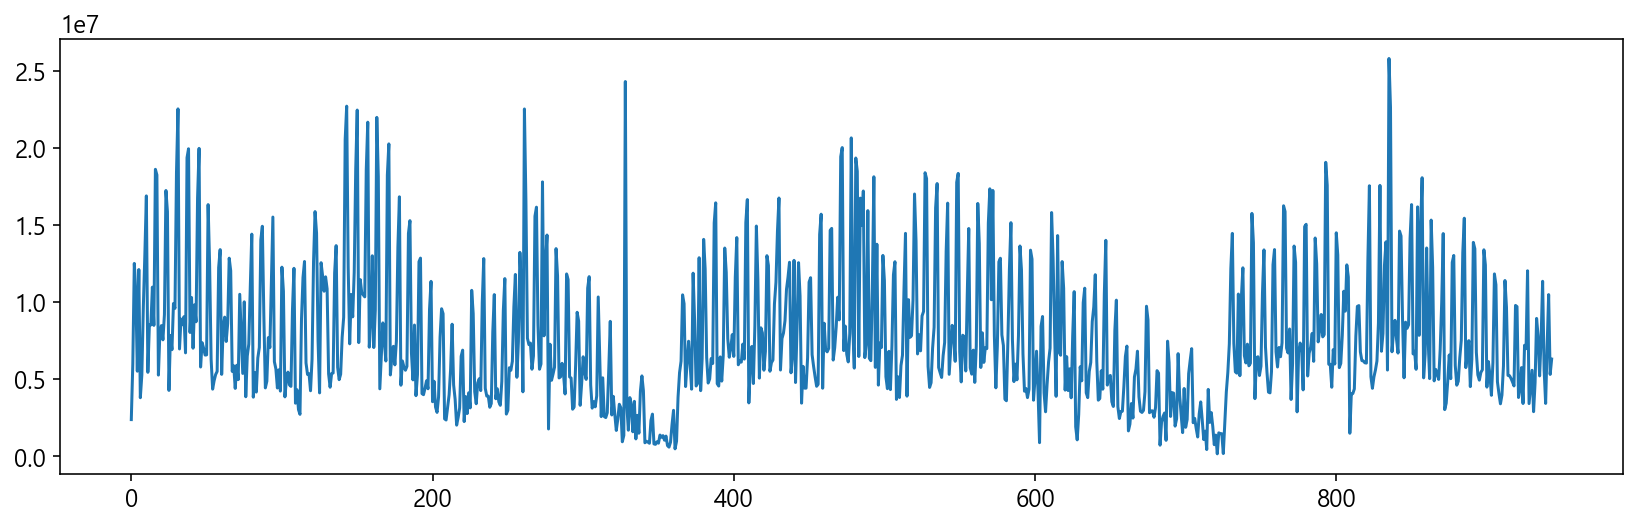

In [45]:
import numpy as np
import pandas as pd

raw_df=pd.read_csv("./Raw.csv",thousands = ',')
raw_df=raw_df.rename(columns={' 매출':'매출',' 순매출':'순매출',
                                ' 수량':'수량', ' 평균소비자가':'평균소비자가',
                                ' Stores':'Stores', ' SKU':'SKU'})
data.head(30)

def weekday2(data):
    list=[]
    for i in data:
        # weekday()는 해당 날짜의 요일을 출력. 5는 토,6은 일요일
        if datetime.strptime(f"{i}", "%m/%d/%Y").weekday()>=5:
            list.append(1)
        else:
            list.append(0)
    return list

raw_df['week']=weekday2(raw_df['판매일자'])
# len(weekday2(raw_df['판매일자']))
raw_df['순매출'].plot()

<AxesSubplot:>

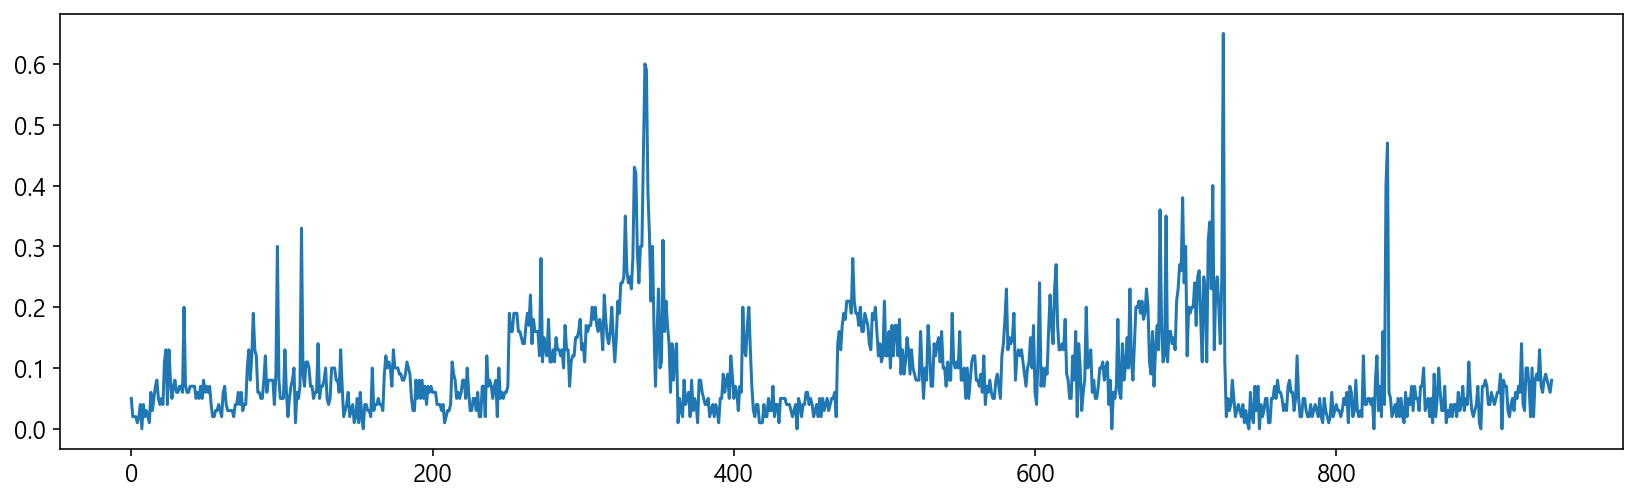

In [48]:
raw_df['할인율'].plot()

<AxesSubplot:>

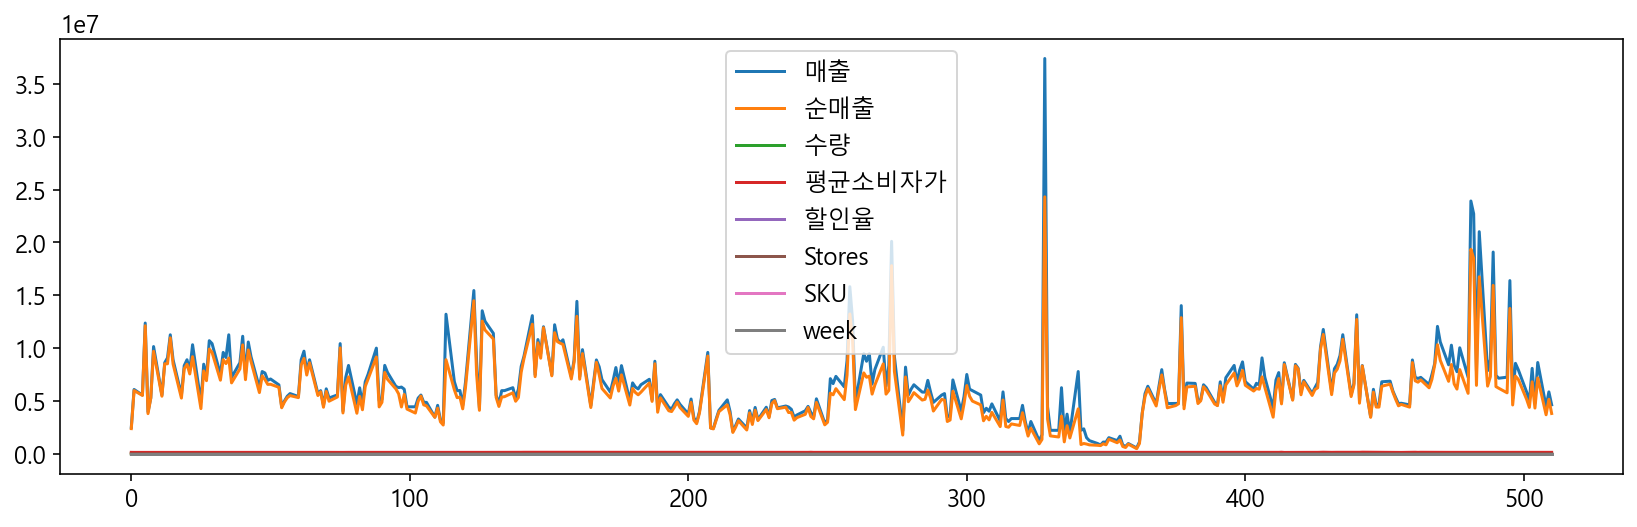

In [80]:
#raw_df['매출'].plot()
raw_df[70:90] # 2017년 8월
raw_df[365+35:365+60] # 2018년 7월
raw_df[750:780] # 2019년 7월
#변수아이디어2 : 썸머위크 (실패..)

# 블랙프라이데이(11월)
raw_df[90+70:90+90] # 2017년 11월
raw_df[130+365+35:130+365+60] # 2018년 11월
raw_df[140+750:140+780] # 2019년 11월

# 변수아이디어3 : 가장 인기가 많다는 리액트 인피니트런 출시일자
# 그러나 첫 출시날짜를 모르겠음....

df=raw_df[raw_df['week']==0]
df.head(365).plot()


In [81]:
# 변수 아이디어4 : 평일 중 가장 괜찮은 요일?
def weekday3(data):
    list=[]
    for i in data:
        # weekday()는 해당 날짜의 요일을 출력. 5는 토,6은 일요일
        list.append(datetime.strptime(f"{i}", "%m/%d/%Y").weekday())
    return list

raw_df['allweek']=weekday3(raw_df['판매일자'])


<AxesSubplot:xlabel='SKU', ylabel='수량'>

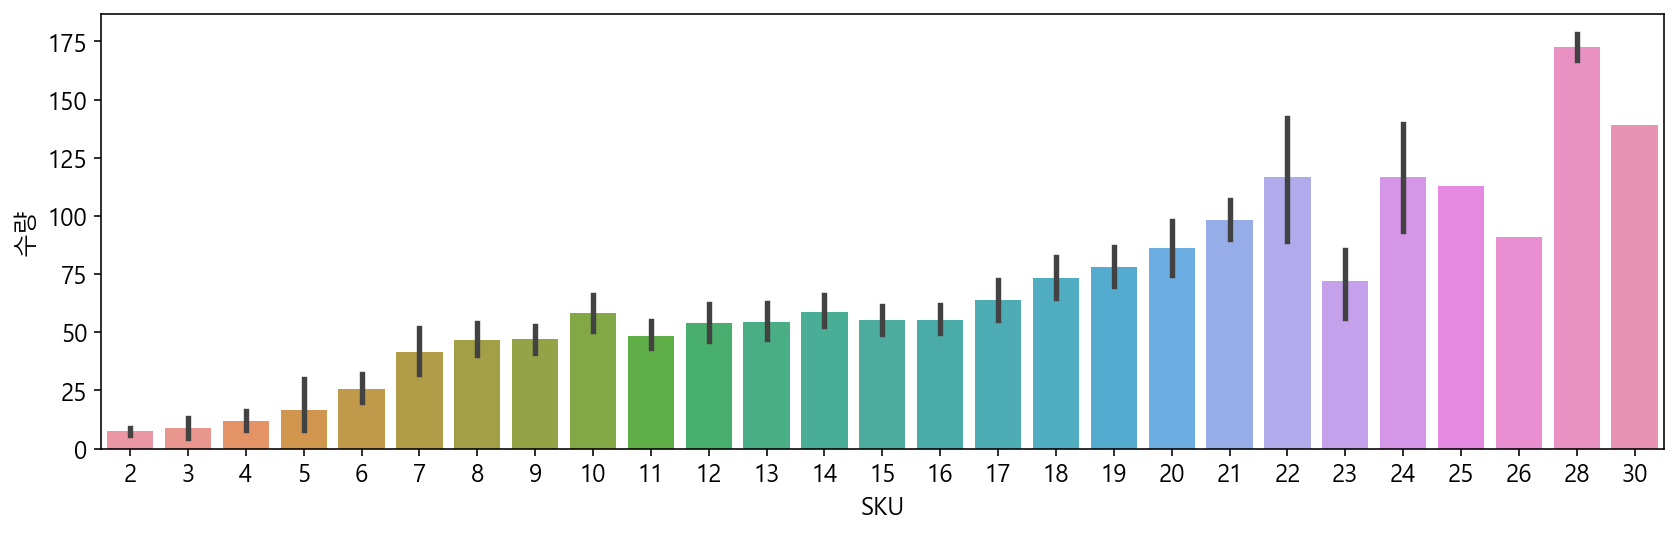

In [102]:
raw_df.groupby('allweek')['순매출'].sum()
raw_df.groupby('allweek')['순매출'].mean()
raw_df.groupby('allweek')['순매출'].max()
raw_df.groupby('allweek')['순매출'].describe()

# raw_df.groupby('allweek')['순매출'].plot()
import seaborn as sns
sns.barplot(x='SKU',y='수량',data=raw_df)

In [100]:
highsku=(raw_df['SKU']>=24)
raw_df['highsku']=highsku.astype(int)

In [101]:
raw_df.head()

,판매일자,매출,순매출,수량,평균소비자가,할인율,Stores,SKU,week,allweek,highsku
0,6/1/2017,2502000,2383400,18,139000,0.05,48,4,0,3,0
1,6/2/2017,6086000,5984800,45,135244,0.02,48,8,0,4,0
2,6/3/2017,12778000,12510600,92,138891,0.02,48,8,1,5,0
3,6/4/2017,10842000,10631400,78,139000,0.02,48,7,1,6,0
4,6/5/2017,5560000,5522100,41,135610,0.01,48,7,0,0,0


<AxesSubplot:xlabel='평균소비자가', ylabel='순매출'>

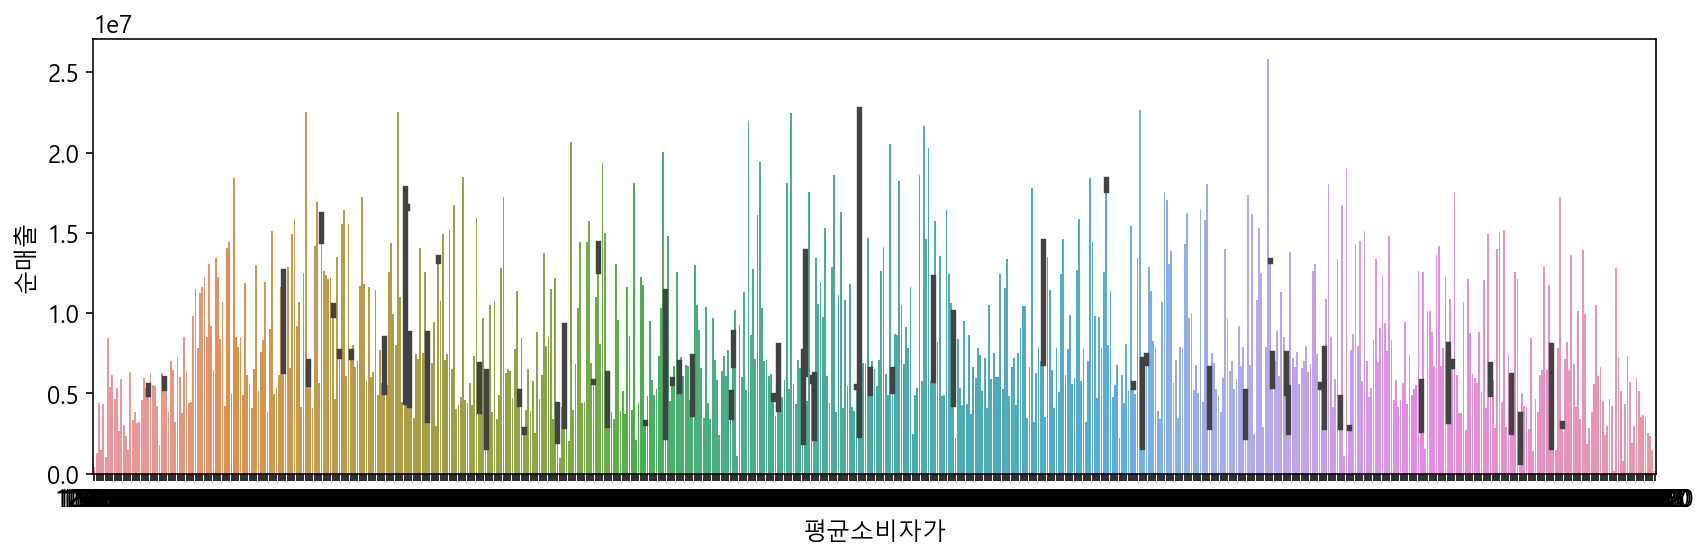

In [98]:
sns.barplot(x='평균소비자가',y='순매출',data=raw_df)

<AxesSubplot:xlabel='Stores', ylabel='순매출'>

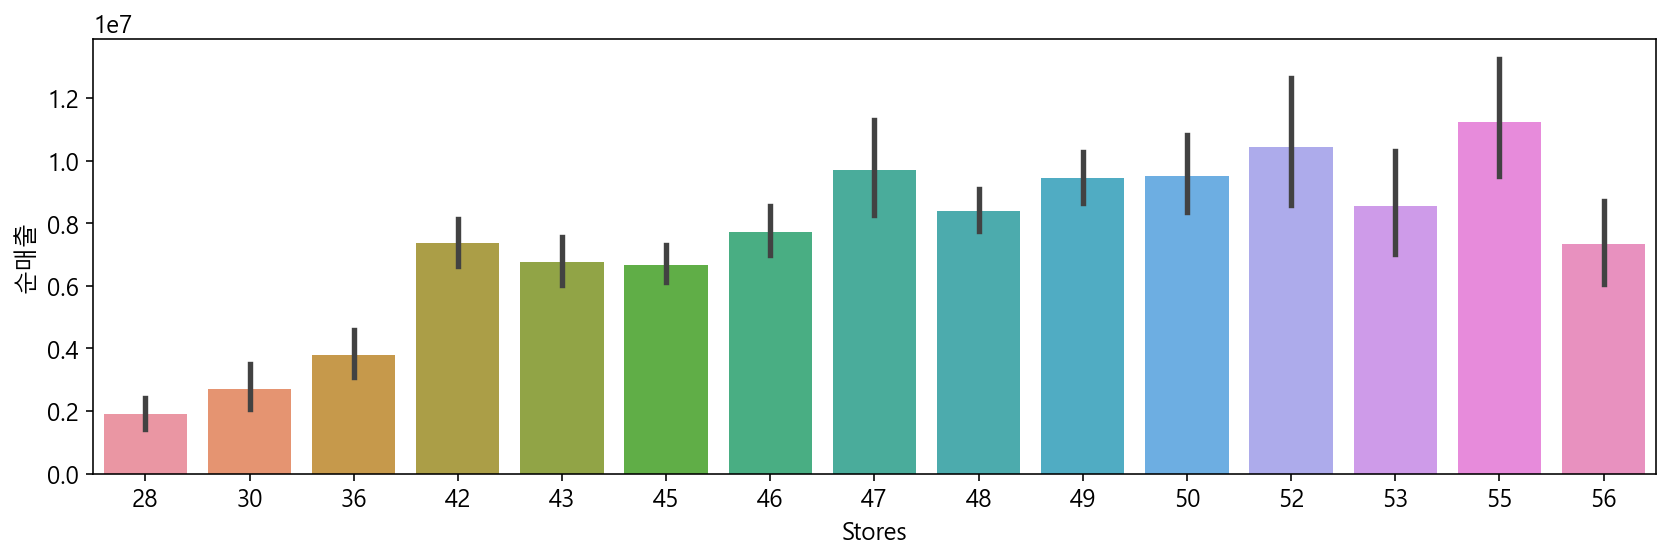

In [121]:
sns.barplot(x='Stores',y='순매출',data=raw_df)

In [ ]:
sns.barplot(x='Stores',y='순매출',data=raw_df)

In [118]:
# 다중공선성과 상관관계는 회귀분석시에만 필요

from statsmodels.stats.outliers_influence import variance_inflation_factor 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pllt

raw_df=pd.read_csv("./Raw.csv",thousands = ',')
raw_df=raw_df.rename(columns={' 매출':'매출',' 순매출':'순매출',
                                ' 수량':'수량', ' 평균소비자가':'평균소비자가',
                                ' Stores':'Stores', ' SKU':'SKU'})

window_size = 7
data_size = 8 # 학습에 사용할 변수 갯수

##### 새로운 변수 추가######

def weekday2(data):
    list=[]
    for i in data:
        # weekday()는 해당 날짜의 요일을 출력. 5는 토,6은 일요일
        if datetime.strptime(f"{i}", "%m/%d/%Y").weekday()>=5:
            list.append(1)
        else:
            list.append(0)
    return list

raw_df['week']=weekday2(raw_df['판매일자'])
# 주말 변수 : 주말 수량, 매출이 평일보다 많음.

# 높은 SKU 변수 : 24이상
highsku=(raw_df['SKU']>=24)
raw_df['highsku']=highsku.astype(int)

# dfx = raw_df[[ '평균소비자가','할인율','week','highsku']]
dfx = raw_df[['수량', '평균소비자가',
              '할인율', 'Stores', 'SKU','week','highsku']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfx.values, i) for i in range(dfx.shape[1])]
vif["features"] = dfx.columns
vif
dfx.corr()

# 다중공선성과 상관관계는 회귀분석시에만 필요

,수량,평균소비자가,할인율,Stores,SKU,week,highsku
수량,1.000000,-0.115553,-0.108244,0.407085,0.447548,0.641934,0.211074
평균소비자가,-0.115553,1.000000,-0.006692,-0.234141,0.372645,0.022557,0.059042
할인율,-0.108244,-0.006692,1.000000,-0.336166,-0.066890,-0.023343,0.040982
Stores,0.407085,-0.234141,-0.336166,1.000000,0.220454,0.019869,0.065085
SKU,0.447548,0.372645,-0.066890,0.220454,1.000000,0.291556,0.296608
week,0.641934,0.022557,-0.023343,0.019869,0.291556,1.000000,0.094791
highsku,0.211074,0.059042,0.040982,0.065085,0.296608,0.094791,1.000000


In [ ]:
dfx = raw_df[['순매출','수량', '평균소비자가',
              '할인율', 'Stores', 'SKU','week','highsku']]
dfx.corr()
# 다중공선성과 상관관계는 회귀분석시에만 필요

In [132]:

dfx = raw_df[['순매출','수량', '평균소비자가',
              '할인율', 'Stores', 'SKU',
              'week','highsku','gaza']] # 이거 갯수=data_size 수
len(dfx.columns)

9